In [2]:
from scipy.optimize import curve_fit 
import numpy as np
import matplotlib.pyplot as plt

## Данные и обсчет для ионизационной камеры

In [3]:
P = [728.6,698.6,678.6,678.6,658.6,638.6,628.6,618.6,598.6,578.6,578.6,558.6,538.6,528.6,518.6,498.6,478.6,428.6,378.6,328.6,
298.6,278.6,248.6,228.6,198.6,178.6,129.6,118.6,98.6,79.6,78.6,58.6,38.6,26.6] #торр - давление для ионизационной камеры
I = [880,883,887,887,898,900,901,904,904,907,907,905,890,883,870,836,800,698,605,507,449,416,362,332,282,252,172,155,124,97,
94,67,37,19] #пА - ток в камере
P_error = 2.5
I_error = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,2,2,2,1,1,1,1,1,1,0,1,1,0,0,0,0,0]

[  1.73536254 -48.41605088]
[-2.03578732e-01  1.02754832e+03]


<Figure size 432x288 with 0 Axes>

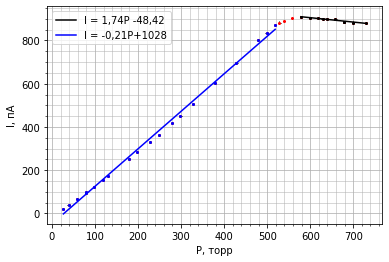

In [4]:
fig = plt.figure()
z1 = np.polyfit(P[14:], I[14:], 1) #строим прямую по наклону графика
f1 = np.poly1d(z1)
I_new1 = f1(P[14:])
print(f1.c) 

z = np.polyfit(P[:10], I[:10], 1) #строим прямую по плато на графике
f = np.poly1d(z)
I_new = f(P[:10])
print(f.c) 

fig, ax = plt.subplots()
plt.plot(P, I,color = 'red', marker ='o', linestyle = 'None', markersize = 2)
plt.errorbar(P, I, yerr = I_error, xerr = P_error,fmt='none',ecolor = 'black',elinewidth = 1)
plt.plot(P[:10], I[:10],color = 'black', marker ='o', linestyle = 'None', markersize = 2)
plt.plot(P[14:], I[14:],color = 'blue', marker ='o', linestyle = 'None', markersize = 2)
plt.plot(P[:10], I_new,color = 'black',label = 'I = 1,74P -48,42')
plt.plot(P[14:], I_new1,color = 'blue', label = 'I = -0,21P+1028')
plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('I, пА')
ax.set_xlabel('P, торр')
plt.legend()
plt.show()
fig.savefig('I(P)', dpi = 1000)

## Данные и обсчет для сцинтилляционного счетчика

In [5]:
P1 = [328.6,278.6,248.6,228.6,198.6,178.6,168.6,148.6,129.6,118.6,98.6,88.6,79.6,78.6,58.6,38.6,26.6]
N = [4,70,325,728,1291,1690,1921,2199,2624,2714,2879,3025,3129,3192,3323,3413,3625]
N_error = [2,8,18,27,36,41,44,47,51,52]

Экстраполированное давление Р = 267.708 торр
[ -18.69040878 5003.58029866]


<Figure size 432x288 with 0 Axes>

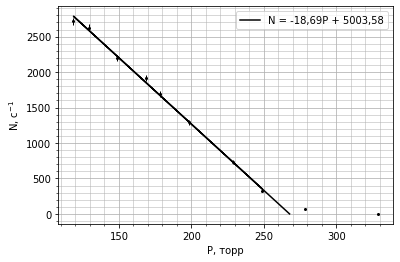

In [15]:
fig = plt.figure()
zc = np.polyfit(P1[2:10], N[2:10], 1) #честно предлагаю нахуй выкинуть какое-то количество точек
fc = np.poly1d(zc)

Pc = round((0 - fc.c[1])/fc.c[0], 3)
print('Экстраполированное давление Р =', Pc, 'торр')

x_ax = P1[2:10]+[(0 - fc.c[1])/fc.c[0]]
N_new = fc(x_ax) #сразу строю пересечение с осью абсцисс
print(fc.c) 

fig, ax = plt.subplots()
plt.plot(P1[:10], N[:10],color = 'black', marker ='o', linestyle = 'None', markersize = 2)
plt.plot(x_ax, N_new,color = 'black', label='N = -18,69P + 5003,58')
plt.errorbar(P1[:10], N[:10], yerr = N_error,fmt='none',ecolor = 'black',elinewidth = 1)
plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('N, с$^{-1}$')
ax.set_xlabel('P, торр')
plt.legend()
plt.show()
fig.savefig('N(P)', dpi = 1000)

## Данные и обсчет для счетчика Гейгера

In [7]:
x = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 12]#мм
Ng = [781, 793, 743, 791, 737, 797, 696, 710, 853, 903, 737, 734, 788, 789, 813, 660, 662, 326, 100, 35, 26]#хз
t = [54, 50, 45, 51, 51, 52, 48, 47, 58, 63, 51, 53, 59, 57, 67, 68, 95, 102, 122, 104, 101]#c

n = []
for i in range(len(x)):
    x[i] = x[i] + 10
    n.append(Ng[i]/t[i])

[ -5.40939296 103.79447291]


<Figure size 432x288 with 0 Axes>

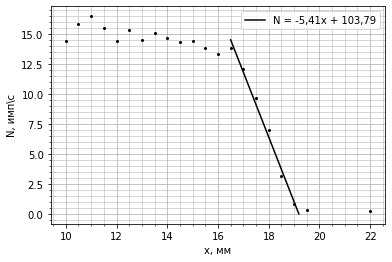

In [17]:
fig = plt.figure()
#аппроксимирую наклон + добавляю точку (х, 0) - среднюю длину пробега
zg = np.polyfit(x[13:19], n[13:19], 1)
fg = np.poly1d(zg)
a = x[13:19] + [(0 - fg.c[1])/fg.c[0]]
b = fg(a)
print(fg.c) 

fig, ax = plt.subplots()
plt.plot(x, n, color = 'black',marker ='o', linestyle = 'None', markersize = 2)
plt.plot(a, b, color = 'black', label = 'N = -5,41x + 103,79')
plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('N, имп\с')
ax.set_xlabel('x, мм')
plt.legend()
plt.show()
fig.savefig('N(x)', dpi = 1000)

In [47]:
Rav = 0.1*(x[13]+x[18])/2
Rex = 0.1*(0 - fg.c[1])/fg.c[0]
print('Средняя длина пробега по Гейгеру:', round(Rav, 2), 'см или', round(Rav*1.225, 2), 'г/см^2',
      '\nЭкстраполированная длина пробега по Гейгеру:', round(Rex, 2), 'см или', round(Rex*1.255, 2), 'г/см^2')

Средняя длина пробега по Гейгеру: 2.78 см или 3.4 г/см^2 
Экстраполированная длина пробега по Гейгеру: 2.92 см или 3.66 г/см^2


# UPD: все погрешности считать по мнк, в pdf-отчетах она слишком большая !!!